# Глава 2. Частотное представление

Выполнил студент группы ИКТ-11М

Елецких Евгений

---

## Быстрое преобразование Фурье (FFT) в Python

Now that we have learned about what an FFT is and how the output is represented, let’s actually look at some Python code and use Numpy’s FFT function, `np.fft.fft()`. It is recommended that you use a full Python console/IDE on your computer, but in a pinch you can use the online web-based Python console linked at the bottom of the navigation bar on the left.

First we need to create a signal in the time domain. Feel free to follow along with your own Python console. To keep things simple, we will make a simple sine wave at 0.15 Hz. We will also use a sample rate of 1 Hz, meaning in time we sample at 0, 1, 2, 3 seconds, etc.

In [14]:
import import_ipynb

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets # for sliders



# слайдер
my_slider = widgets.FloatSlider(
    value = 1,
    min   = 0.1,
    max   = 5,
    step  = 0.1,
    description = 'Freq, Hz:',
    disabled = False,
    continuous_update = False,
    orientation = 'horizontal',
    readout = True,
    readout_format = '.1f'
)

# функция генерирует синусоиду на интервале времени [0 1]
# N - количество отсчетов
# freq_Hz - частота синусоиды в Гц
# doPlot - отрисовывать график или нет
def create_sine(N, freq_Hz, doPlot):    
    t = np.arange(0, 1+1/N, 1/N)
    s = np.sin(freq_Hz*2*np.pi*t)
    if doPlot > 0 :
        fig, ax = plt.subplots(1)
        ax.plot(t,s,'.-')
        ax.set_title('s(t,f) = sin(2$\pi$ft)')
        ax.set_xlabel('t, sec')
        ax.set_ylabel('Signal Amplitude')
        ax.grid('on')
   
    
wid1 = interact(create_sine, N = fixed(500), freq_Hz = my_slider, doPlot = fixed(True))
display(wid1)


interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='Freq, Hz:', max=5.0, min=0.…

<function __main__.create_sine(N, freq_Hz, doPlot)>

Next let’s use Numpy’s FFT function:

In [7]:
t = np.arange(100)
freq_Hz = 0.15
s = np.sin(freq_Hz*2*np.pi*t)

S = np.fft.fft(s)

If we look at `S`'s first elements we see it’s an array of complex numbers:

In [8]:
print('S =', S[1:6])

S = [-1.55941444e-15-2.44249065e-15j  1.46492774e-14+2.90199510e-15j
 -1.77131595e-14+3.66373598e-15j  7.15901218e-15-7.90410510e-17j
 -5.36670238e-16+0.00000000e+00j]


Hint: regardless of what you’re doing, if you ever run into complex numbers, try calculating the magnitude and the phase and see if they make more sense. Let’s do exactly that, and plot the magnitude and phase. In most languages, `np.abs()` is a function for magnitude of a complex number. The function for phase varies, but in Python it’s `np.angle()`.

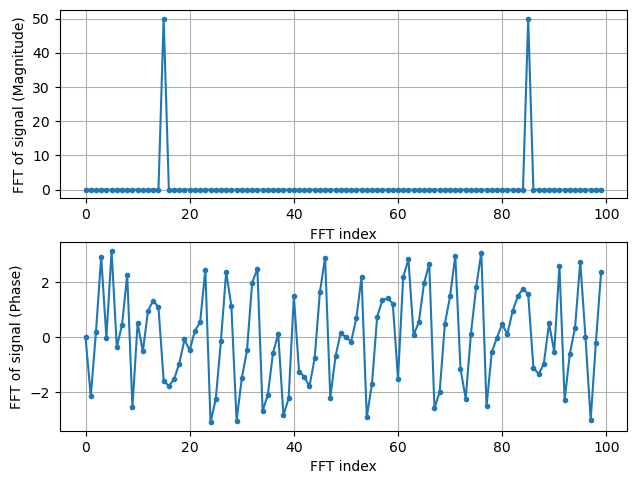

In [12]:
S_mag = np.abs(S)
S_phase = np.angle(S)


fig, [ax1, ax2] = plt.subplots(2,1)
fig.tight_layout() # чтобы графики не накладывались друг на друга

ax1.plot(t,S_mag,'.-')
ax1.set_xlabel('FFT index')
ax1.set_ylabel('FFT of signal (Magnitude)')
ax1.grid('on')

ax2.plot(t,S_phase,'.-')
ax2.set_xlabel('FFT index')
ax2.set_ylabel('FFT of signal (Phase)')
ax2.grid('on')

plt.show()

Right now we aren’t providing any x-axis to the plots, it’s just the index of the array (counting up from 0). Due to mathematical reasons, the output of the FFT has the following format:

![Рисунок 1](img/1.PNG)

But we want 0 Hz (DC) in the center and negative freqs to the left (that’s just how we like to visualize things). So any time we do an FFT we need to perform an “FFT shift”, which is just a simple array rearrangement operation, kind of like a circular shift but more of a “put this here and that there”. The diagram below fully defines what the FFT shift operation does:

![Рисунок 2](img/2.PNG)

For our convenience, Numpy has an FFT shift function, `np.fft.fftshift()`. Replace the `np.fft.fft()` line with:

In [15]:
S = np.fft.fftshift(np.fft.fft(s))

We also need to figure out the x-axis values/label. Recall that we used a sample rate of 1 Hz to keep things simple. That means the left edge of the frequency domain plot will be -0.5 Hz and the right edge will be 0.5 Hz. If that doesn’t make sense, it will after you get through the chapter on IQ Sampling. Let’s stick to that assumption that our sample rate was 1 Hz, and plot the FFT output’s magnitude and phase with a proper x-axis label. Here is the final version of this Python example and the output:

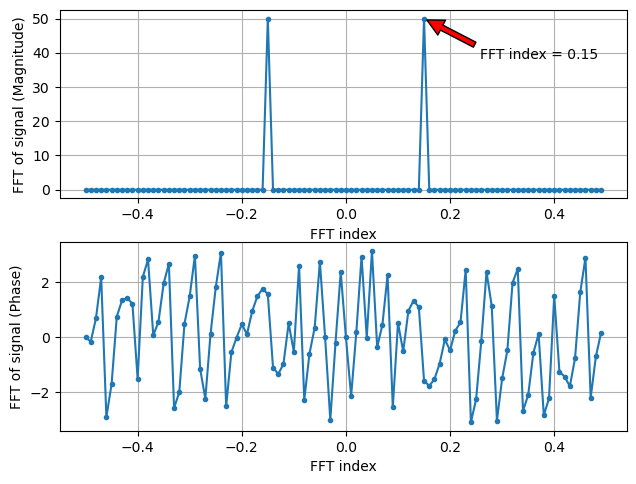

In [58]:
Fs = 1 # частота дискретизации, Гц
N = 100 # количество отсчетов для симуляции и длина нашего FFT

t = np.arange(N) # потому что частота дискретизации равна 1 Гц
s = np.sin(0.15*2*np.pi*t)
S = np.fft.fftshift(np.fft.fft(s))
S_mag = np.abs(S)
S_phase = np.angle(S)
f = np.arange(Fs/-2, Fs/2, Fs/N)

fig, [ax1, ax2] = plt.subplots(2,1)
fig.tight_layout() # чтобы графики не накладывались друг на друга

ax1.plot(f,S_mag,'.-')
ax1.set_xlabel('FFT index')
ax1.set_ylabel('FFT of signal (Magnitude)')
ax1.grid(True)

# рисуем стрелку
ax1.annotate('FFT index = 0.15',
             xy = (0.15,50), 
             xycoords = 'data',
             xytext = (0.95, 0.8), # смещение окончания подписи происходит в долях от всего рисунка, т.е. 0,5 - середина соответствующей оси
             textcoords = 'axes fraction',
             arrowprops = dict(facecolor='red', shrink = 0.05),
             horizontalalignment = 'right', 
             verticalalignment = 'top'
            )

ax2.plot(f,S_phase,'.-')
ax2.set_xlabel('FFT index')
ax2.set_ylabel('FFT of signal (Phase)')
ax2.grid(True)


Note that we see our spike at 0.15 Hz, which is the frequency we used when creating the sine wave. So that means our FFT worked! If we did not know the code used to generate that sine wave, but we were just given the list of samples, we could use the FFT to determine the frequency. The reason why we see a spike also at -0.15 Hz has to do with the fact it was a real signal, not complex, and we will get deeper into that later.

## Windowing

When we use an FFT to measure the frequency components of our signal, the FFT assumes that it’s being given a piece of a periodic signal. It behaves as if the piece of signal we provided continues to repeat indefinitely. It’s as if the last sample of the slice connects back to the first sample. It stems from the theory behind the Fourier Transform. It means that we want to avoid sudden transitions between the first and last sample because sudden transitions in the time domain look like many frequencies, and in reality our last sample doesn’t actually connect back to our first sample. To put it simply: if we are doing an FFT of 100 samples, using `np.fft.fft(x)`, we want `x[0]` and `x[99]` to be equal or close in value.

The way we make up for this cyclic property is through “windowing”. Right before the FFT, we multiply the slice of signal by a window function, which is just any function that tapers to zero on both ends. That ensures the slice of signal will begin and end at zero and connect. Common window functions include Hamming, Hanning, Blackman, and Kaiser. When you don’t apply any windowing, it’s called using a “rectangular” window because it’s like multiplying by an array of ones. Here is what several window functions look like:

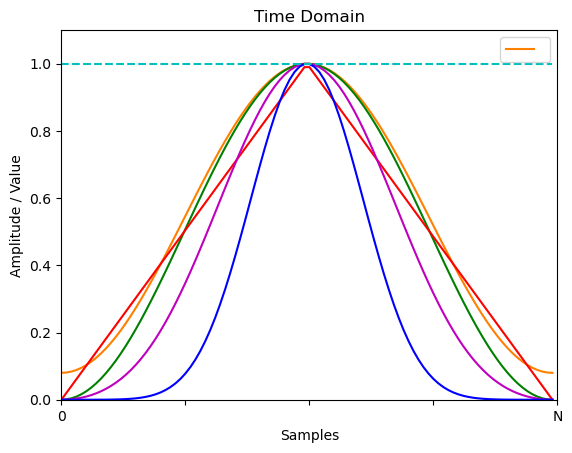

In [139]:
plt.figure(0)
plt.plot (np.hamming (100),    color = '#ff8000')
plt.plot (np.hanning (100),    color = 'g')
plt.plot (np.bartlett(100),    color = 'r')
plt.plot (np.blackman(100),    color = 'm')
plt.plot (np.kaiser  (100,20), color = 'b')

# поскольку в модуле numpy нет прямоугольного окна, нарисуем его самостоятельно
x = np.arange(100)
y = 1+0*x
plt.plot(x,y, '--', color = 'c')

plt.xlim(0,100)
plt.ylim(0,1.1)
#plt.grid(False)

plt.ylabel('Amplitude / Value')
plt.xlabel('Samples')
plt.title('Time Domain')

# подписи к оси ОХ
xticks = ["0", "", "", "","N"]
plt.xticks([0,25, 50, 75, 100], xticks)

plt.legend(['Hamming', 'Hanning', 'Barlett', 'Blackman', 'Kaiser'])
